In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
import os

from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import plot_confusion_matrix

In [2]:
studentmerge = pd.read_csv("Data/student-merge-clean.csv")
studentmerge_encoded = pd.get_dummies(studentmerge)

In [3]:
y = studentmerge_encoded["Walc"]
X = studentmerge_encoded.drop(["Walc"],axis=1)

In [31]:
feature_names = [atts for atts in X]
class_names = ["1","2","3","4","5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators = 1792, min_samples_split= 2, min_samples_leaf= 1, max_features = 'auto', max_depth = 38,
bootstrap = False)

clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

# Export as dot file

estimator = clf.estimators_[49]

export_graphviz(estimator, out_file='tree.dot', 

                feature_names = feature_names,

                class_names = class_names,
                
                rounded = True, proportion = False, 

                precision = 200, filled = True)

(graph,) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png')

Image(filename = 'tree.png')

0.8038277511961722


In [5]:
correct = 0

for i in range(len(X_test)):
    a = clf.predict([X_test.iloc[i]])
    msg = ""
    if y_test.values[i] == a[0]:
        msg = "=====CORRECT====="
        correct += 1
    print("Actual={}  --  Predict={} -- {}".format(y_test.values[i],a, msg))

print(correct/len(X_test))

Actual=4  --  Predict=[4] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=5  --  Predict=[5] -- =====CORRECT=====
Actual=3  --  Predict=[4] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=2  --  Predict=[1] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=4  --  Predict=[3] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=4  --  Predict=[4] -- =====CORRECT=====
Actual=5  --  Predict=[4] -- 
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=4  --  Predict=[4] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[3] -- 
Actu

In [19]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [22]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

clf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 269 out of 300 | elapsed:   33.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   38.3s finished


{'n_estimators': 1780,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 43,
 'bootstrap': False}

In [29]:
# Getting the optimal hyperparameters

# Number of trees in random forest
n_estimators = list(range(1700, 1900))
# Maximum number of levels in tree
max_depth = list(range(35, 50))
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
optimal_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

grid_search = GridSearchCV(estimator = clf, param_grid = optimal_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 4869 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 6813 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 7906 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 |

{'bootstrap': False,
 'max_depth': 38,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1792}

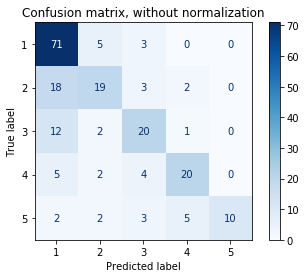

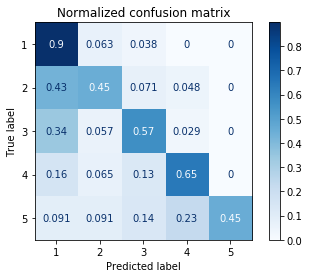

In [8]:
np.set_printoptions(precision=2)

# Plot non-normalized and normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

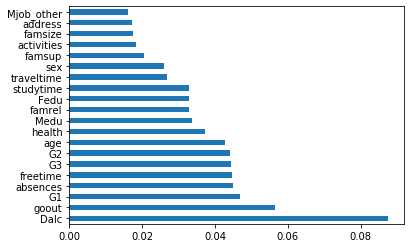

In [9]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()